In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train = pd.read_csv("TRAIN.csv")

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [6]:
test = pd.read_csv("TEST_FINAL.csv")

In [7]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [8]:
ID = test["ID"]

In [9]:
X_test = test.drop(["ID"], axis = 1)


In [20]:
date = pd.to_datetime(train_cp["Date"])

KeyError: 'Date'

In [10]:
train_cp = train.drop(["ID", "#Order", "Date"], axis=1)

In [93]:
train_cp["year"] = list(map(int, train_cp["Date"].str.split("-")[0]))
train_cp["month"] = list(map(int, train_cp["Date"].str.split("-")[1]))
train_cp["Day"] = list(map(int, train_cp["Date"].str.split("-")[2]))

train_cp = train.drop(["#Order", "ID", "Date"], axis=1)

ValueError: Length of values (3) does not match length of index (188340)

In [11]:
train_cp.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,S1,L3,R1,1,Yes,7011.84
1,253,S4,L2,R1,1,Yes,51789.12
2,252,S3,L2,R1,1,Yes,36868.20
3,251,S2,L3,R1,1,Yes,19715.16
4,250,S2,L3,R4,1,Yes,45614.52


In [12]:
train_cp.nunique()

Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Holiday              2
Discount             2
Sales            47422
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_cp["Store_Type"] =  le.fit_transform(train_cp["Store_Type"])
X_test["Store_Type"] = le.transform(X_test["Store_Type"])

train_cp["Location_Type"] = le.fit_transform(train_cp["Location_Type"])
X_test["Location_Type"] = le.transform(X_test["Location_Type"])

train_cp["Region_Code"] = le.fit_transform(train_cp["Region_Code"])
X_test["Region_Code"] = le.transform(X_test["Region_Code"])

train_cp["Discount"] = le.fit_transform(train_cp["Discount"])
X_test["Discount"] = le.transform(X_test["Discount"])

In [14]:
train_cp.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,0,2,0,1,1,7011.84
1,253,3,1,0,1,1,51789.12
2,252,2,1,0,1,1,36868.20
3,251,1,2,0,1,1,19715.16
4,250,1,2,3,1,1,45614.52


In [15]:
y = train_cp["Sales"]
X = train_cp.drop(["Sales"], axis=1)

In [16]:
train_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188340 non-null  int64  
 1   Store_Type     188340 non-null  int32  
 2   Location_Type  188340 non-null  int32  
 3   Region_Code    188340 non-null  int32  
 4   Holiday        188340 non-null  int64  
 5   Discount       188340 non-null  int32  
 6   Sales          188340 non-null  float64
dtypes: float64(1), int32(4), int64(2)
memory usage: 7.2 MB


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid = train_test_split(train_cp, test_size = 0.8, shuffle=False)

In [18]:
y_train = X_train["Sales"]
X_train = X_train.drop(["Sales"], axis = 1)
y_valid = X_valid["Sales"]
X_valid = X_valid.drop(["Sales"], axis = 1)

In [19]:
X_train.tail()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
37663,144,0,2,2,1,0
37664,43,0,0,1,1,0
37665,85,3,1,0,1,0
37666,72,0,1,2,1,0
37667,207,0,0,2,1,0


In [20]:
y_train.tail()

37663    30375.30
37664    27766.53
37665    52282.02
37666    41046.00
37667    42788.79
Name: Sales, dtype: float64

In [21]:
X_valid.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
37668,205,0,0,1,1,0
37669,232,0,0,3,1,0
37670,24,0,0,1,1,0
37671,316,3,1,0,1,0
37672,346,3,0,0,1,0


In [22]:
y_valid.head()

37668    35662.20
37669    31321.50
37670    13962.18
37671    45372.00
37672    45370.98
Name: Sales, dtype: float64

# data processing

In [33]:
train_cp.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,0,2,0,1,1,7011.84
1,253,3,1,0,1,1,51789.12
2,252,2,1,0,1,1,36868.20
3,251,1,2,0,1,1,19715.16
4,250,1,2,3,1,1,45614.52


In [34]:
train_cp.nunique()

Store_id           365
Store_Type           4
Location_Type        5
Region_Code          4
Holiday              2
Discount             2
Sales            47422
dtype: int64

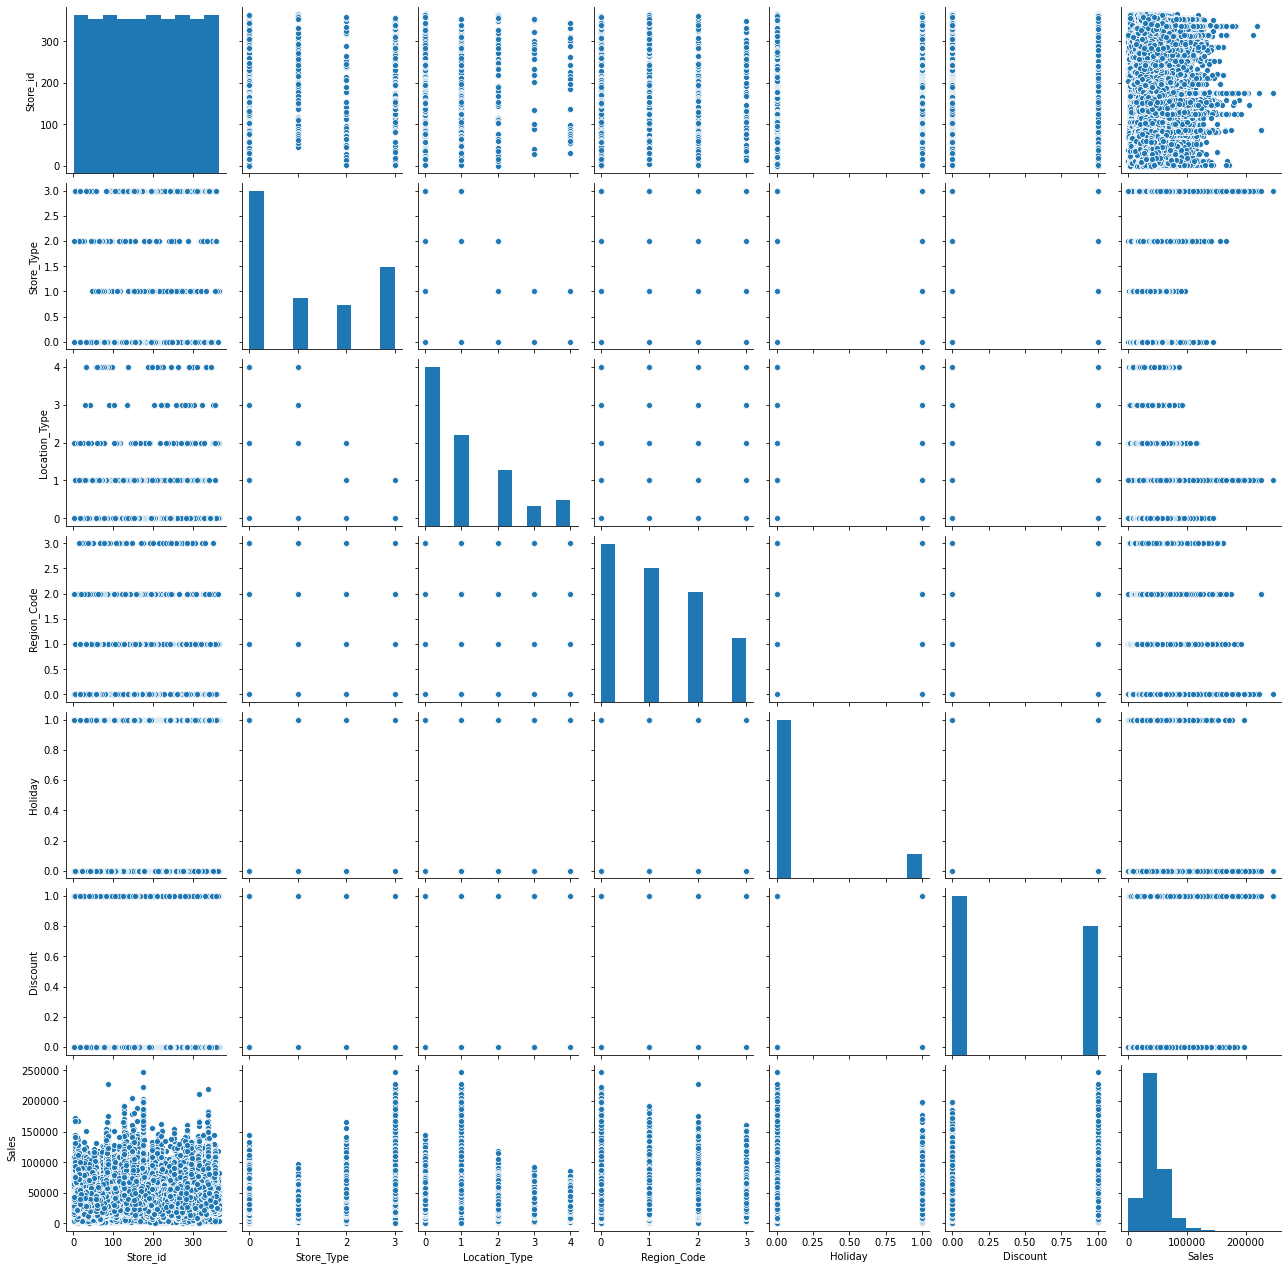

In [31]:
sns.pairplot(train_cp)

In [35]:
train_cp.corr()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
Store_id,1.000000e+00,8.627203e-02,6.729649e-02,-1.252935e-01,-4.477583e-19,-0.000693,0.004377
Store_Type,8.627203e-02,1.000000e+00,-1.009121e-01,-2.438844e-01,5.584485e-17,0.002121,0.492471
Location_Type,6.729649e-02,-1.009121e-01,1.000000e+00,-7.198033e-02,-3.105675e-17,0.000419,-0.283771
Region_Code,-1.252935e-01,-2.438844e-01,-7.198033e-02,1.000000e+00,-4.138573e-17,0.000147,-0.121003
Holiday,-4.477583e-19,5.584485e-17,-3.105675e-17,-4.138573e-17,1.000000e+00,0.019545,-0.154779
Discount,-6.928774e-04,2.121497e-03,4.190224e-04,1.471481e-04,1.954527e-02,1.000000,0.323906
Sales,4.376631e-03,4.924707e-01,-2.837714e-01,-1.210026e-01,-1.547788e-01,0.323906,1.000000


In [68]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [69]:
from sklearn.linear_model import Ridge
model2 = Ridge()
model2.fit(X_train, y_train)

Ridge()

In [70]:
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train, y_train)

Lasso()

In [71]:
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor(n_estimators=100)
model4.fit(X_train, y_train)

RandomForestRegressor()

In [72]:
from sklearn.ensemble import ExtraTreesRegressor

model5 = ExtraTreesRegressor()
model5.fit(X_train, y_train)

ExtraTreesRegressor()

In [42]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

model6 = GradientBoostingRegressor()
model6.fit(X_train, y_train)

GradientBoostingRegressor()

In [74]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model7 = HistGradientBoostingRegressor()
model7.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [78]:
from sklearn.ensemble import VotingRegressor

model = VotingRegressor(estimators = [("m1", model1), ("m2", model2), ("m3", model3), ("m4", model4),("m5", model5), ("m6", model6),("m7",  model7)])
model.fit(X_train, y_train)

VotingRegressor(estimators=[('m1', LinearRegression()), ('m2', Ridge()),
                            ('m3', Lasso()), ('m4', RandomForestRegressor()),
                            ('m5', ExtraTreesRegressor()),
                            ('m6', GradientBoostingRegressor()),
                            ('m7', HistGradientBoostingRegressor())])

In [82]:
y_pred = model.predict(X_valid)

In [83]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_valid, y_pred)

0.11607443951371257

In [81]:
model.fit(X, y)

VotingRegressor(estimators=[('m1', LinearRegression()), ('m2', Ridge()),
                            ('m3', Lasso()), ('m4', RandomForestRegressor()),
                            ('m5', ExtraTreesRegressor()),
                            ('m6', GradientBoostingRegressor()),
                            ('m7', HistGradientBoostingRegressor())])

In [84]:
y_test = model.predict(X_test)

In [85]:
res = pd.DataFrame({"ID":ID, "Sales":y_test})

In [86]:
res.head()

,ID,Sales
0,T1188341,51564.426506
1,T1188342,35367.325623
2,T1188343,61003.568670
3,T1188344,33799.689520
4,T1188345,35312.771916


In [87]:
res.to_csv("votingreg.csv", index=False)